In [61]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Heart Attack.csv")

In [62]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [63]:
dummies=pd.get_dummies(df['class'])
dummies.head()

,negative,positive
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [64]:
df=pd.concat([df,dummies],axis='columns')
df.head(2)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,negative,positive
0,64,1,66,160,83,160.0,1.80,0.012,negative,1,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,0,1


In [65]:
df=df.drop(['class','negative'],axis='columns')

In [66]:
y=df['positive']

In [67]:
y.loc[2:5]

2    0
3    1
4    0
5    0
Name: positive, dtype: uint8

In [68]:
X=df.drop(['positive'],axis='columns')
X.loc[4:7]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
4,55,1,64,112,65,300.0,1.08,0.003
5,58,0,61,112,58,87.0,1.83,0.004
6,32,0,40,179,68,102.0,0.71,0.003
7,63,1,60,214,82,87.0,300.00,2.370


In [69]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
print(X_train)

      age  gender  impluse  pressurehight  pressurelow  glucose     kcm  \
841    77       0      108            111           70    277.0    3.17   
997    86       1       60            154           81    112.0  300.00   
1010   35       1       60            109           65    222.0    3.27   
1090   75       0       63            110           59    111.0    1.80   
659    50       0       66            160           83     98.0    5.75   
...   ...     ...      ...            ...          ...      ...     ...   
250    75       1       65            107           57    140.0    1.64   
1296   65       1       60            112           56     95.0    4.22   
892    53       0       86            165           83     99.0    1.41   
136    67       1       58            119           72    109.0    1.50   
139    43       0       79             89           57     98.0    2.46   

      troponin  
841      0.021  
997      1.790  
1010     0.003  
1090     0.043  
659      0.142

In [70]:
#  standard scaler =>StandardScaler is used to resize the distribution of values
#   so that the mean of the observed values ​​is 0 and the standard deviation is 1.

In [71]:
# here StandardScaler() means z = (x - u) / s
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [72]:
# fitting logistic to the training set
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [73]:
print("train score = ",model.score(X_train_scaled,y_train))
print("test_score = ",model.score(X_test_scaled,y_test))

train score =  1.0
test_score =  0.9772727272727273


In [74]:
#  prediciting the test set result

y_pred_scaled=model.predict(X_test_scaled)
print(y_pred_scaled)

[1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0
 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0
 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1
 0 1 1 0 1]


In [75]:
# confussion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_scaled)
print(cm)

[[101   4]
 [  2 157]]


Text(58.222222222222214, 0.5, 'truth')

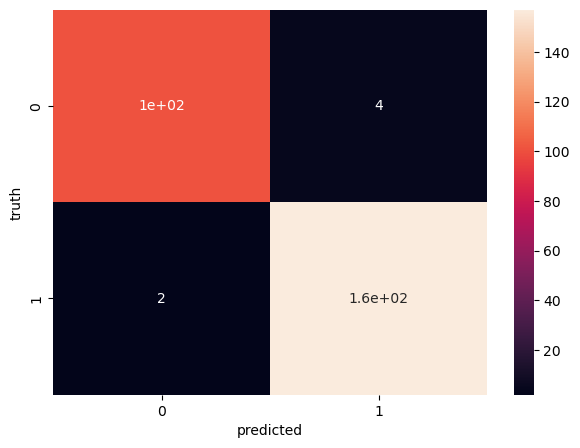

In [76]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [77]:
# #  printing auc after standard scaled model
# from sklearn.metrics import roc_curve,auc
# y_pred_scaled_test=model.predict_proba(X_test_scaled)
# test_fpr,test_tpr,_=roc_curve(y_test,y_pred_scaled_test)

# plt.plot(test_fpr,test_tpr,label="auc test ="+str(auc(test_fpr,test_tpr)))
# plt.plot([0,1],[0,1],'g--')
# plt.legend()
# plt.xlabel("false positive rate")
# plt.ylabel("true positive rate")
# plt.title("auc(roc curve)")
# plt.show()

In [78]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test_scaled,y_test_pred_scaled,digits=3))

In [79]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

0.9810606060606061

In [80]:
print(y_test)

802     1
866     1
924     1
631     0
1237    0
       ..
1258    0
231     0
1034    1
615     0
323     1
Name: positive, Length: 264, dtype: uint8


In [81]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=uint8)

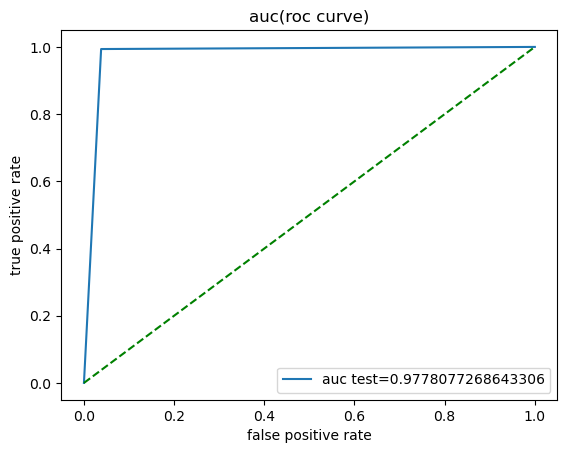

In [82]:
# printing c au
#  this is plotted for not scaled training data 
#  else other remaing topic in this program are done for scaled  training data
from sklearn.metrics import roc_curve,auc
y_predTest=classifier.predict_proba(X_test)

test_fpr,test_tpr,_=roc_curve(y_test,y_pred)
plt.plot(test_fpr,test_tpr,label='auc test='+str(auc(test_fpr,test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("auc(roc curve)")
plt.show()


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.990     0.962     0.976       105
           1      0.975     0.994     0.984       159

    accuracy                          0.981       264
   macro avg      0.983     0.978     0.980       264
weighted avg      0.981     0.981     0.981       264



In [84]:
#  parameter turning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# 10 folds selected
kfold=KFold(n_splits=10 ,random_state=0,shuffle=True)
results=cross_val_score(model,X_train_scaled,y_train,cv=kfold)
print(results)

[0.99056604 0.99056604 1.         1.         0.99056604 0.97142857
 0.99047619 0.99047619 0.95238095 0.99047619]


In [85]:
print("accuracy :%3f%% (%.3f%%)" % (results.mean()*100.0,results.std()*100.0))

accuracy :98.669362% (1.361%)


In [86]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'criterion':["gini", 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth': [3, 4, 5, 6, 7, 8],

}
grid = GridSearchCV(model,param_grid, cv=5)
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [87]:
print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=4)


In [88]:
# 10 folds selected
kfold=KFold(n_splits=10,random_state=0,shuffle=True)
model1=DecisionTreeClassifier(criterion='log_loss', max_depth=4)
results=cross_val_score(model,X_train_scaled,y_train,cv=kfold)

print(results)
print('\n')
# output the accuracy calculates mean and std also 
print("accuracy : %.3f%%(%.3f%%)"%(results.mean()*100 , results.std()*100))

[1.         0.99056604 1.         1.         0.99056604 0.98095238
 1.         0.99047619 0.96190476 0.99047619]


accuracy : 99.049%(1.127%)
